In [4]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist as Hist

In [189]:
#Working with atar data

with uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar') as testfile:
    print(testfile.keys())
    # print(testfile.arrays())
    data = testfile.arrays(['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time'])
    print(data)
    print()


['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time', 'nhit', 'has_pion', 'pion_decay', 'pion_dar', 'has_muon', 'muon_decay', 'muon_dar', 'has_positron', 'pion_total_edep', 'muon_total_edep', 'pos_total_edep', 'has_excited_nucleus', 'external_total_edep']
[{pixel_hits: [102900, 102899, 102898, 102897, ... pixel_edep: [], pixel_time: []}]



In [190]:
data = np.random.normal(50, 10, 1000)

data = np.linspace(-100, 100, 100)

h = Hist.new.Reg(100, 0, 100).Double()

h.fill(data)





Hist(Regular(100, 0, 100, label='Axis 0'), storage=Double()) # Sum: 49.0 (100.0 with flow)

In [13]:
def build_spline(hist):
    from scipy.interpolate import UnivariateSpline, CubicSpline
    
    centers = hist.axes[0].centers

    amps = h.values()/np.amax(h.values())

    spline = CubicSpline(centers, amps, extrapolate = False)

    return spline



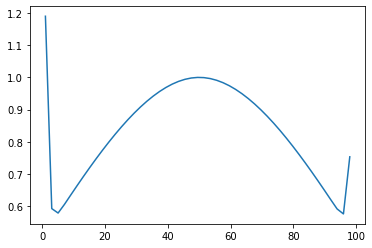

In [192]:
xs = data
ys = build_spline(h)(xs)

#The notation above creates y value arrangement of same length as xs

fig, ax = plt.subplots()

plt.plot(xs, ys)

plt.show()


In [193]:

def adjacent_pixels(pixeli, n=2, pixels_per_plane=100, **kwargs):
    '''
        Returns this pixel and the n pixels on either side in the same plane
    '''
    return [x for x in range(pixeli-n, pixeli+n+1) if (int(np.ceil(float(x)/pixels_per_plane)) == int(np.ceil(float(pixeli)/pixels_per_plane)))]

In [194]:
def adjacent_pixelsv2(pixel, n = 2):
    '''
        Returns this pixel and the n pixels on either side in the same plane. Why can't you write it like this instead of the one above?    
    '''
    
    return [x for x in range(pixel - n, pixel + n + 1)]

In [195]:
adjacent_pixelsv2(50)

[48, 49, 50, 51, 52]

In [196]:
def greetme(**kwargs):
    for key, value in kwargs.items():
        print("{0} = {1}".format(key, value))

In [197]:
greetme(name = 'dylan')

name = dylan


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3734efe640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

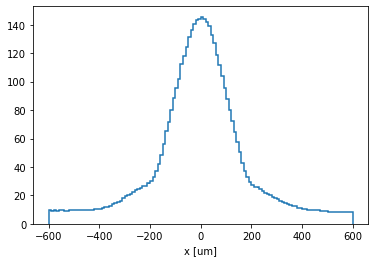

In [198]:
ref_data = '/home/dylan/pioneer/atar_waveform/atar_waveform/data/BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

h.plot()



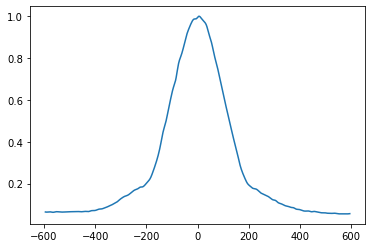

In [199]:
# Now I have to create a spline for this histogram for modelling purposes

xs = np.linspace(h.axes[0].centers[0], h.axes[0].centers[-1], 1000)
#The above creates evenly spaced values starting at one end of the histogram to the other


ys = build_spline(h)(xs)

fig, ax = plt.subplots()

plt.plot(xs, ys)

In [200]:
f = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

data = f['pixel_edep'].array()

# Number of vectors
len(data)


200000

In [201]:
t = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')
data = t.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
pdg = data['pixel_pdg'][0]
edep = data['pixel_edep'][0]
time = data['pixel_time'][0]
hits = data['pixel_hits'][0]


print(edep)
print(hits)
print(len(edep),
len(hits))

[0.0445, 0.0939, 0.0618, 0.0264, 0.43, ... 0.0119, 0.0512, 0.0307, 0.00183, 0.0162]
[102900, 102899, 102898, 102897, 102787, ... 100029, 100028, 100027, 100232, 100232]
72 72


In [5]:
def get_number_of_slits(spline_width, pitch, sensor_width):

    '''
        Based on slit parameters, returns how many other slits an energy 
        deposit hit can share with on one side assuming the original hit was in
        center. 
    '''

    a = spline_width - ((sensor_width/2) + pitch)
    b = sensor_width + pitch

    return int(np.floor((a/b) + 1))

In [6]:
get_number_of_slits(600, 200, 100)

2

In [8]:
def adjacent_slits(pixel, n, pitch = 200, width = 100):
    # return[x*pitch_plus_width + pixel for x in range(-n, n + 1)]
    slits = []
    for i in range(-n, n + 1):
        if abs(i) < n:
            slits.append(pixel + int(i * (pitch + width)))
        elif i < 0:
                slits.append(pixel + int((i + 1) * (pitch + width) - (pitch + width/2)))
        else:
            slits.append(pixel + int((i - 1) * (pitch + width) + (pitch + width/2)))  
                  
    return slits




In [10]:
print(adjacent_slits(10, 2))

[-540, -290, 10, 310, 560]


In [205]:
def share_energy(atar_tree, sensor_width = 100, pitch = 200):

    data = atar_tree.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
    pdg = data['pixel_pdg'][0]
    edep = data['pixel_edep'][0]
    time = data['pixel_time'][0]
    hits = data['pixel_hits'][0]


    for hit in hits: 








IndentationError: expected an indented block (2896937067.py, line 16)

In [ ]:
adjacent_slits(100, 2)

In [ ]:
for i in range (-5, 5 + 1):
    print(i)

In [218]:
ref_data = '/home/dylan/pioneer/atar_waveform/atar_waveform/data/BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

spline = build_spline(h)

atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

data = atar.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
pdg = data['pixel_pdg'][0]
edep = data['pixel_edep'][0]
time = data['pixel_time'][0]
hits = data['pixel_hits'][0]



for i,  hit in enumerate(hits):

    these_energies = []

    places = adjacent_slits(hit, n = 2)
            
    for pos in places:
        energyi = spline(pos - hit) * edep[i]
        these_energies.append(energyi)
    
    #Normalize the energies to conserve energy
    these_energies = np.array(these_energies) * (edep[i]/np.sum(these_energies))

# print("total Energy", np.sum(these_energies), edep[i])

        




In [106]:
#This version works but only computes energy sharing for 


def compute_energy_sharing(atar, spline, pixels_per_plane = 100, pitch = 200, splinewidth = 600):

    '''
    Returns a digitized form atar pixel data
    '''

    output = {
        'pixel_pdg':[],
        'pixel_edep':[],
        'pixel_time':[],
        'pixel_hits':[]
    }


    data = atar.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
    pdg = data['pixel_pdg'][1]
    edep = data['pixel_edep'][1]
    time = data['pixel_time'][1]
    hits = data['pixel_hits'][1]
 
        
    for i, hit in enumerate(hits):
        #Loop over all hits and calculate energy sharing

        these_energies = []

        places = adjacent_slits(hit, n = 2)
                
        for pos in places:
            energyi = spline(pos - hit) * edep[i]
            these_energies.append(energyi)
        
        #Normalize the energies to conserve energy
        these_energies = np.array(these_energies) * (edep[i]/np.sum(these_energies))

        # print("total Energy", np.sum(these_energies), edep[i])

        output['pixel_edep'] += list(these_energies)
        output['pixel_hits'] += adjacent_slits(hit, 2)
        output['pixel_time'] += list(np.full_like(these_energies, time[i]))
        output['pixel_pdg'] += list(np.full_like(these_energies, pdg[i], dtype=int))
        

    return output



In [109]:

ref_data = '/home/dylan/pioneer/atar_waveform/atar_waveform/data/BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

spline = build_spline(h)

atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

out  = compute_energy_sharing(atar, spline)['pixel_edep']
old  = atar['pixel_edep']

#The algorithm has the same total energy but now the number of pixels with energy has been scaled by a factor of 5


print(sum(out))
print(sum(old.array()[2]))

print(len(old.array()[2]))
print(len(out))



0
0
0
0


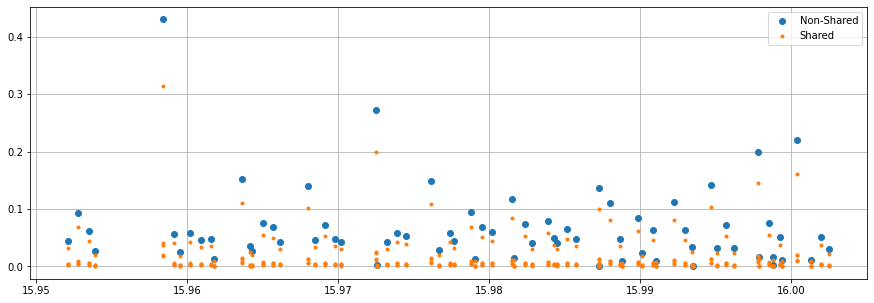

In [42]:
# Here is what my algorithm computes


import awkward as ak

atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

output = compute_energy_sharing(atar, spline)

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(atar['pixel_time'].array()[0], atar['pixel_edep'].array()[0],"o", label='Non-Shared')
plt.plot(output['pixel_time'], output['pixel_edep'],".", label='Shared')

plt.grid()
plt.legend()
plt.show()

In [114]:
ref_data = './BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

defaultspline = build_spline(h)



def compute_energy_sharing(atar, spline = defaultspline, pixels_per_plane = 100, pitch = 200, splinewidth = 600):

    '''
    Returns a digitized form atar pixel data in dictionary form
    '''

    output = {
        'pixel_pdg':[],
        'pixel_edep':[],
        'pixel_time':[],
        'pixel_hits':[]
    }



    
    for v in range(10):  

        data = atar.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
        pdg = data['pixel_pdg'][v]
        edep = data['pixel_edep'][v]
        time = data['pixel_time'][v]
        hits = data['pixel_hits'][v]

        pdglist = []
        edeplist = []
        timelist = []
        hitslist = []

        for i, hit in enumerate(hits):
            #Loop over all hits and calculate energy sharing

            these_energies = []

            places = adjacent_slits(hit, n = 2)
                    
            for pos in places:
                energyi = spline(pos - hit) * edep[i]
                these_energies.append(energyi)
            
            #Normalize the energies to conserve energy
            these_energies = np.array(these_energies) * (edep[i]/np.sum(these_energies))

            # print("total Energy", np.sum(these_energies), edep[i])

            pdglist += list(np.full_like(these_energies, pdg[i], dtype=int))
            edeplist += list(these_energies)
            timelist += list(np.full_like(these_energies, time[i]))
            hitslist += adjacent_slits(hit, n = 2)

        output['pixel_pdg'].append(pdglist)
        output['pixel_edep'].append(edeplist) 
        output['pixel_time'].append(timelist)
        output['pixel_hits'].append(hitslist)

    return output

            
            

In [117]:
atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

output = compute_energy_sharing(atar)

output['pixel_edep'][5]

[0.006138446414288694,
 0.01193554352475957,
 0.09284216253360106,
 0.01130975778390731,
 0.005189231480130806,
 0.004141551584132384,
 0.008052798030033309,
 0.06263972662859317,
 0.007630586325077917,
 0.0035011252695696534,
 0.00029865180933312475,
 0.0005806960635424493,
 0.004517019120427231,
 0.0005502499162362902,
 0.00025246996813102545,
 0.0025425776660731258,
 0.004943766606458832,
 0.03845572527576084,
 0.004684562771961833,
 0.0021494077124713427,
 0.0017018019121504985,
 0.0033089693095162474,
 0.02573924394942823,
 0.0031354786086933255,
 0.001438644806757914,
 0.0004312681475054857,
 0.0008385541549099968,
 0.006522801494701824,
 0.0007945883956643856,
 0.00036457925937152455,
 0.0014735797962390168,
 0.002865216148873912,
 0.02228745283663224,
 0.0027149916193662756,
 0.0012457136791694757,
 6.89595358164802e-05,
 0.00013408434083075582,
 0.0010429923144091217,
 0.0001270542404931047,
 5.8296019866054865e-05]

In [116]:
atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

for i in range(40):
    print(i, atar['pixel_edep'].array()[i])

0 [0.0445, 0.0939, 0.0618, 0.0264, 0.43, ... 0.0119, 0.0512, 0.0307, 0.00183, 0.0162]
1 []
2 []
3 []
4 []
5 [0.127, 0.086, 0.0062, 0.0528, 0.0353, 0.00895, 0.0306, 0.00143]
6 []
7 [0.0142, 0.0319, 0.00188, 0.18, 0.0207, 0.0649, 0.0534, 0.0384, 0.0815, 0.0113]
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 [0.0013, 0.0614, 0.119, 0.0202, 0.079, ... 0.0699, 0.0584, 0.00444, 0.0687, 0.0329]
18 []
19 [0.0123, 0.553, 0.34, 0.0322, 0.0621, ... 0.109, 0.0465, 0.0158, 0.0662, 0.052]
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 [0.0208, 0.0625, 0.0329, 0.0473, 0.0404, ... 0.0755, 0.0185, 0.00879, 0.00747, 0.23]
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 [0.179, 0.0119, 0.0285, 0.00594, 0.0172, ... 0.106, 0.00817, 0.0472, 0.0505, 0.0033]
36 [0.0131, 0.117, 0.354, 0.0451, 0.0767, ... 0.0641, 0.0458, 0.0247, 0.0623, 0.00925]
37 []
38 []
39 []


In [104]:
dic = {
    "list":[]
}

first = [1, 2, 3]
second = [4, 5, 6]

dic['list'].append(first)
dic['list'].append(second)
dic['list']

[[1, 2, 3], [4, 5, 6]]

In [118]:
atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

print(len(atar['pixel_edep'].array()))

200000


In [124]:
def compute_energy_sharing(atar, entry, spline = defaultspline, pixels_per_plane = 100, pitch = 200, splinewidth = 600):

    '''
    Returns a digitized form atar pixel data in dictionary form
    '''

    output = {
        'pixel_pdg':[],
        'pixel_edep':[],
        'pixel_time':[],
        'pixel_hits':[]
    }


    data = atar.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
    pdg = data['pixel_pdg'][entry]
    edep = data['pixel_edep'][entry]
    time = data['pixel_time'][entry]
    hits = data['pixel_hits'][entry]

 
        
    for i, hit in enumerate(hits):
        #Loop over all hits and calculate energy sharing

        these_energies = []

        places = adjacent_slits(hit, n = 2)
                
        for pos in places:
            energyi = spline(pos - hit) * edep[i]
            these_energies.append(energyi)
        
        #Normalize the energies to conserve energy
        these_energies = np.array(these_energies) * (edep[i]/np.sum(these_energies))

        # print("total Energy", np.sum(these_energies), edep[i])

        output['pixel_edep'] += list(these_energies)
        output['pixel_hits'] += adjacent_slits(hit, n = 2)
        output['pixel_time'] += list(np.full_like(these_energies, time[i]))
        output['pixel_pdg'] += list(np.full_like(these_energies, pdg[i], dtype=int))

    return output

In [130]:
#Demonstration of compute energysharing for entry n
atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

test = compute_energy_sharing(atar, 5)

test['pixel_edep']

[0.006138446414288694,
 0.01193554352475957,
 0.09284216253360106,
 0.01130975778390731,
 0.005189231480130806,
 0.004141551584132384,
 0.008052798030033309,
 0.06263972662859317,
 0.007630586325077917,
 0.0035011252695696534,
 0.00029865180933312475,
 0.0005806960635424493,
 0.004517019120427231,
 0.0005502499162362902,
 0.00025246996813102545,
 0.0025425776660731258,
 0.004943766606458832,
 0.03845572527576084,
 0.004684562771961833,
 0.0021494077124713427,
 0.0017018019121504985,
 0.0033089693095162474,
 0.02573924394942823,
 0.0031354786086933255,
 0.001438644806757914,
 0.0004312681475054857,
 0.0008385541549099968,
 0.006522801494701824,
 0.0007945883956643856,
 0.00036457925937152455,
 0.0014735797962390168,
 0.002865216148873912,
 0.02228745283663224,
 0.0027149916193662756,
 0.0012457136791694757,
 6.89595358164802e-05,
 0.00013408434083075582,
 0.0010429923144091217,
 0.0001270542404931047,
 5.8296019866054865e-05]